In [15]:
%load_ext autoreload
%autoreload 2

from tqdm import tqdm
from pathlib import Path
import numpy as np

from hloc import (
    extract_features,
    match_features,
    reconstruction,
    visualization,
    pairs_from_exhaustive,
)
from hloc.visualization import plot_images, read_image
from hloc.utils import viz_3d

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [24]:
images = Path("data/image-matching-challenge-2025/test/ETs")
outputs = Path("outputs/demo/")
!rm -rf $outputs
sfm_pairs = outputs / "pairs-sfm.txt"
loc_pairs = outputs / "pairs-loc.txt"
sfm_dir = outputs / "sfm"
features = outputs / "features.h5"
matches = outputs / "matches.h5"

feature_conf = extract_features.confs["disk"]
matcher_conf = match_features.confs["disk+lightglue"]

outliers_out_et001.png
another_et_another_et008.png
another_et_another_et004.png
another_et_another_et010.png
et_et004.png
another_et_another_et001.png
outliers_out_et002.png
et_et006.png
et_et003.png
another_et_another_et003.png
et_et005.png
et_et000.png
outliers_out_et003.png
another_et_another_et005.png
et_et001.png
another_et_another_et009.png
et_et007.png
another_et_another_et007.png
et_et002.png
et_et008.png
another_et_another_et002.png
another_et_another_et006.png
22 mapping images


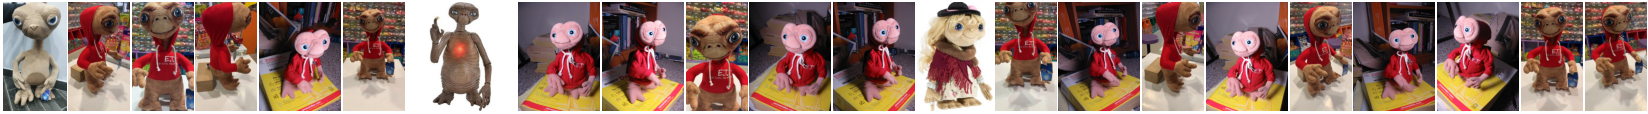

In [25]:
references = [p.relative_to(images).as_posix() for p in images.glob("*.png")]

for r in references:
    print(r)

print(len(references), "mapping images")
plot_images([read_image(images / r) for r in references], dpi=25)

In [26]:
extract_features.main(
    feature_conf, images, image_list=references, feature_path=features
)
pairs_from_exhaustive.main(sfm_pairs, image_list=references)
match_features.main(matcher_conf, sfm_pairs, features=features, matches=matches);

[2025/04/27 22:44:31 hloc INFO] Extracting local features with configuration:
{'model': {'max_keypoints': 5000, 'name': 'disk'},
 'output': 'feats-disk',
 'preprocessing': {'grayscale': False, 'resize_max': 1600}}


100%|██████████| 22/22 [00:00<00:00, 38.53it/s]
[2025/04/27 22:44:32 hloc INFO] Finished exporting features.
[2025/04/27 22:44:32 hloc INFO] Found 231 pairs.
[2025/04/27 22:44:32 hloc INFO] Matching local features with configuration:
{'model': {'features': 'disk', 'name': 'lightglue'},
 'output': 'matches-disk-lightglue'}
100%|██████████| 231/231 [00:04<00:00, 53.64it/s]
[2025/04/27 22:44:36 hloc INFO] Finished exporting matches.


In [ ]:
mapper_options = {"min_model_size" : 2, "max_num_models": 25}
## TODO min_match_score do has an big impact on the number of points
model = reconstruction.main(
    sfm_dir, images, sfm_pairs, features, matches, image_list=references, min_match_score=0.1, mapper_options =mapper_options
)
print(model.images)
fig = viz_3d.init_figure()
viz_3d.plot_reconstruction(
    fig, model, color="rgba(255,0,0,0.5)", name="mapping", points_rgb=True
)
fig.show()

[2025/04/27 22:44:37 hloc INFO] Creating an empty database...
[2025/04/27 22:44:37 hloc INFO] Importing images into the database...
[2025/04/27 22:44:38 hloc INFO] Importing features into the database...
100%|██████████| 22/22 [00:00<00:00, 1938.75it/s]
[2025/04/27 22:44:38 hloc INFO] Importing matches into the database...
100%|██████████| 231/231 [00:00<00:00, 1791.28it/s]
[2025/04/27 22:44:38 hloc INFO] Performing geometric verification of the matches...
I20250427 22:44:38.202341 132062694602304 misc.cc:44] 
Feature matching
I20250427 22:44:38.202656 132063768294976 sift.cc:1432] Creating SIFT CPU feature matcher
I20250427 22:44:38.202706 132063759902272 sift.cc:1432] Creating SIFT CPU feature matcher
I20250427 22:44:38.202727 132065110521408 sift.cc:1432] Creating SIFT CPU feature matcher
I20250427 22:44:38.202807 132065102128704 sift.cc:1432] Creating SIFT CPU feature matcher
I20250427 22:44:38.202848 132065093736000 sift.cc:1432] Creating SIFT CPU feature matcher
I20250427 22:44:3

MapImageIdToImage{1: Image(image_id=1, camera=Camera(camera_id=1), name="another_et_another_et001.png", has_pose=1, triangulated=1330/2085), 2: Image(image_id=2, camera=Camera(camera_id=2), name="another_et_another_et002.png", has_pose=1, triangulated=1359/1963), 3: Image(image_id=3, camera=Camera(camera_id=3), name="another_et_another_et003.png", has_pose=1, triangulated=1006/1946), 4: Image(image_id=4, camera=Camera(camera_id=4), name="another_et_another_et004.png", has_pose=1, triangulated=1243/1905), 5: Image(image_id=5, camera=Camera(camera_id=5), name="another_et_another_et005.png", has_pose=1, triangulated=1274/1839), 6: Image(image_id=6, camera=Camera(camera_id=6), name="another_et_another_et006.png", has_pose=1, triangulated=1030/1776), 7: Image(image_id=7, camera=Camera(camera_id=7), name="another_et_another_et007.png", has_pose=1, triangulated=981/1810), 8: Image(image_id=8, camera=Camera(camera_id=8), name="another_et_another_et008.png", has_pose=1, triangulated=756/1738), 